In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")
%matplotlib inline

In [5]:
 import requests
 from io import StringIO   

In [6]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
source = requests.get(url).text
poll_data = StringIO(source)

In [7]:
poll_df = pd.read_csv(poll_data)

In [8]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 78.0+ KB


In [9]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


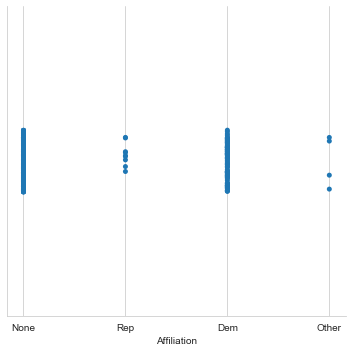

In [10]:
sns.catplot("Affiliation",data=poll_df)

In [11]:
avg = pd.DataFrame(poll_df.mean())
avg.drop("Number of Observations",axis=0,inplace=True)

In [12]:
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN


In [13]:
std = pd.DataFrame(poll_df.std())
std.drop("Number of Observations",axis=0,inplace=True)

In [14]:
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN


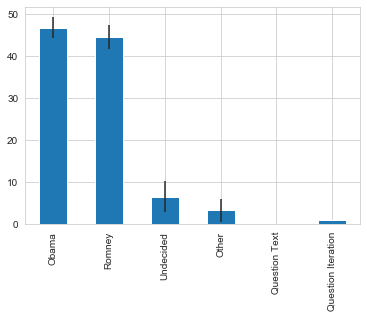

In [20]:
avg.plot(yerr=std,kind="bar",legend=False)

In [15]:
poll_avg = pd.concat([avg,std],axis=1)

In [17]:
poll_avg.columns =["Average", "STD"]

In [18]:
poll_avg.drop("Other",axis=0,inplace=True)
poll_avg.drop("Question Text",axis=0,inplace=True)
poll_avg.drop("Question Iteration",axis=0,inplace=True)

In [19]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


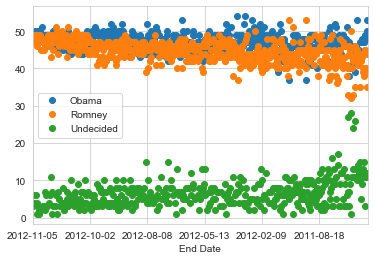

In [20]:
poll_df.plot(x="End Date",y=["Obama","Romney","Undecided"],linestyle="",marker="o")

In [21]:
from datetime import datetime

In [22]:
poll_df["Difference"]=(poll_df.Obama - poll_df.Romney)/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [23]:
#In table difference positives are for Obama is leading and the negatives are for Romney leading by % percent

In [24]:
poll_df = poll_df.groupby(["Start Date"],as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


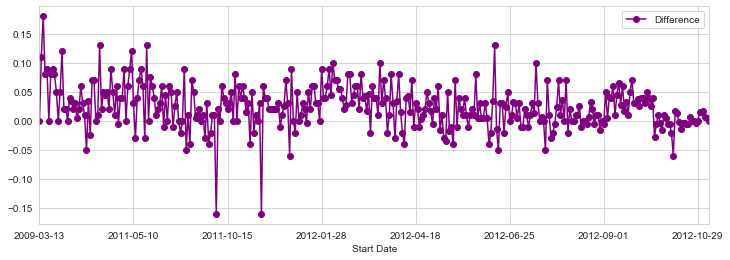

In [25]:
poll_df.plot("Start Date","Difference",figsize=(12,4),marker="o",linestyle="-",color="purple")

In [26]:
#positive side of the graph is for Obama is leading

In [27]:
row_in=0
xlimit =[]
for date in poll_df["Start Date"]:
    if date[0:7]=="2012-10":
        xlimit.append(row_in)
        row_in+=1
    else:
        row_in+=1

print (min(xlimit))
print (max(xlimit))

325
352


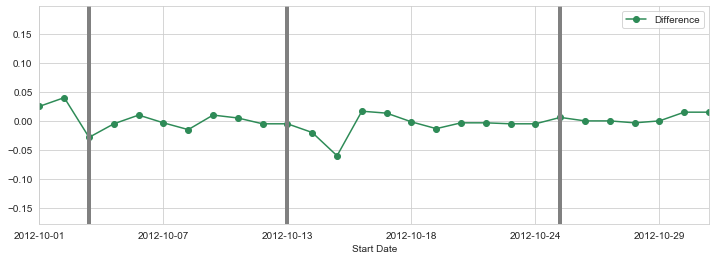

In [30]:
poll_df.plot("Start Date","Difference",figsize=(12,4),marker="o",linestyle="-",color="seagreen",xlim=(325,352))

#Oct 3rd
plt.axvline(x=325+2,linewidth=4,color="grey")

#Oct 11th
plt.axvline(x=325+10,linewidth=4,color="grey")

#Oct 22nd
plt.axvline(x=325+21,linewidth=4,color="grey")

In [28]:
#what happened after debates. Can be seen that after 2nd debate Romney increased his votes

In [31]:
# 150 mb of csv data is used for the upcoming iterations
donor_df = pd.read_csv("/Users/gokberkusta/Downloads/Election_Donor_Data.csv")
#can be found in https://www.dropbox.com/s/l29oppon2veaq4n/Election_Donor_Data.csv?dl=0

In [32]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [33]:
donor_df["contb_receipt_amt"].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [41]:
don_mean = donor_df["contb_receipt_amt"].mean()
don_std = donor_df["contb_receipt_amt"].std()

print("The average donation was ", don_mean , " with a std ",don_std)

The average donation was  298.2351500951093  with a std  3749.666723269043


In [50]:
top_donor = donor_df["contb_receipt_amt"].copy()

top_donor.sort_values()

top_donor

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
            ...  
1001726    5000.0
1001727    2500.0
1001728     500.0
1001729     500.0
1001730    2500.0
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [52]:
top_donor = top_donor[top_donor > 0]
top_donor.sort_values()
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

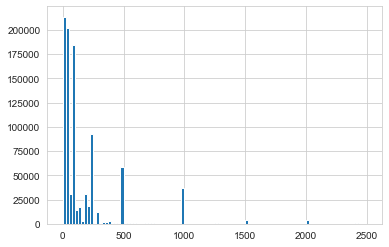

In [54]:
com_don = top_donor[top_donor < 2500]
com_don.hist(bins=100)

In [55]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [56]:
party_map = {'Bachmann, Michelle': 'Republican',
            'Romney, Mitt': 'Republican',
            'Obama, Barack': 'Democrat',
            "Roemer, Charles E. 'Buddy' III": 'Republican',
            'Pawlenty, Timothy': 'Republican',
            'Johnson, Gary Earl': 'Republican',
            'Paul, Ron': 'Republican',
            'Santorum, Rick': 'Republican',
            'Cain, Herman': 'Republican',
            'Gingrich, Newt': 'Republican',
            'McCotter, Thaddeus G': 'Republican',
            'Huntsman, Jon': 'Republican',
            'Perry, Rick': 'Republican'
}

In [57]:
donor_df['Party'] = donor_df.cand_nm.map(party_map)


In [64]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]
#negative contributions removed

In [59]:
donor_df.head(10)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [60]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()


cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [61]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()


cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [65]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
i=0
for don in cand_amount:
    print("The candidate ",cand_amount.index[i]," raise ",don," dollars")
    i+=1

The candidate  Bachmann, Michelle  raise  2711439.29  dollars
The candidate  Cain, Herman  raise  7101081.890000046  dollars
The candidate  Gingrich, Newt  raise  12832769.69  dollars
The candidate  Huntsman, Jon  raise  3330373.48  dollars
The candidate  Johnson, Gary Earl  raise  566961.6000000001  dollars
The candidate  McCotter, Thaddeus G  raise  39030.0  dollars
The candidate  Obama, Barack  raise  135877427.24000013  dollars
The candidate  Paul, Ron  raise  21009619.829994153  dollars
The candidate  Pawlenty, Timothy  raise  6004819.4799999995  dollars
The candidate  Perry, Rick  raise  20305753.999999974  dollars
The candidate  Roemer, Charles E. 'Buddy' III  raise  373009.8999999999  dollars
The candidate  Romney, Mitt  raise  88335907.53000028  dollars
The candidate  Santorum, Rick  raise  11043159.309999963  dollars


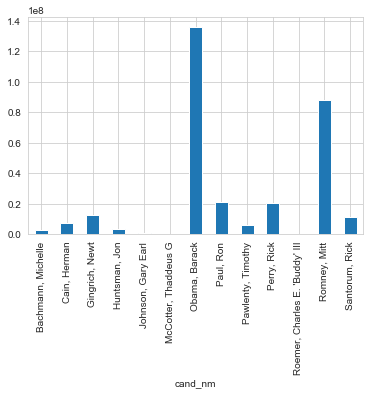

In [66]:
cand_amount.plot(kind="bar")

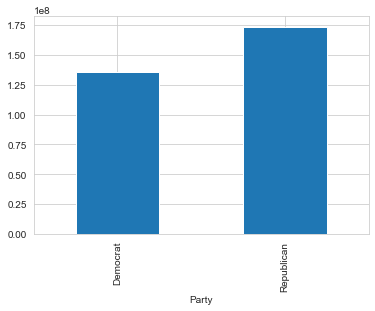

In [67]:
donor_df.groupby("Party")["contb_receipt_amt"].sum().plot(kind="bar")

In [69]:
occupation_df = donor_df.pivot_table("contb_receipt_amt",
                                     index="contbr_occupation",
                                     columns="Party",
                                     aggfunc="sum")

In [70]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [71]:
occupation_df.tail()

Party,Democrat,Republican
contbr_occupation,,
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN
\NONE\,NaN,250.0
~,NaN,75.0


In [72]:
occupation_df.shape

(45067, 2)

In [73]:
occupation_df = occupation_df[occupation_df.sum(1)>1000000]

In [74]:
occupation_df.shape

(31, 2)

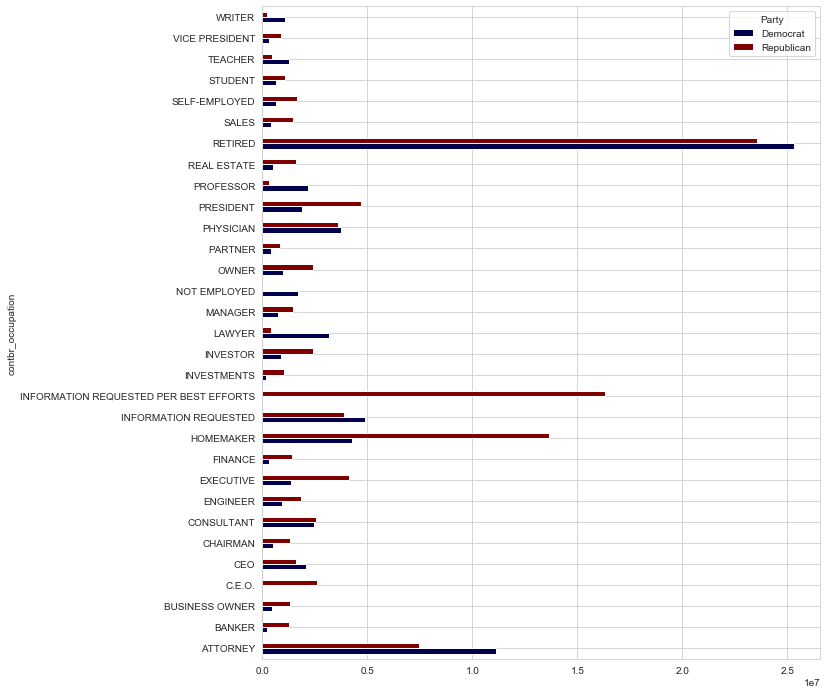

In [77]:
occupation_df.plot(kind="barh",figsize=(10,12),cmap="seismic")